## Data Collection
Predicting total colony forming units (CFU) from particle counts, time of day, weather, percentage of outdoor particulates, or location.

Goal: Organize your data to streamline the next steps of your capstone.

■ Data loading
■ Data joining

In [1]:
#importing the tools
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import os
import glob

import matplotlib.pyplot as plt

In [2]:
#Data loading
data = pd.read_excel(r'data\filt_cfus.xlsx', sheet_name = [0,3,4])

dfIC = pd.read_excel('data\VADIC.xlsx', sheet_name = [1], parse_dates=True)
dfMC = pd.read_excel('data\VADMC.xlsx', sheet_name = [0], parse_dates=True)


# dfMC is both hospital's particle air sampling data.
# dfIC is Infection Control's particle air sampling data.
# dfAHA is both hopsital's ad hoc particle air sampling data.

# Cleaning and unifying CFU data

In [3]:
for key in data:
     print(key, data[key].head())

0                   Date           location  cfu
0  2018-11-30 00:00:00   Inside Room L108    1
1  2018-11-30 00:00:00     ED Parking lot   34
2  2010-11-30 00:00:00  unused agar strip    0
3  2018-11-29 00:00:00  unused agar strip    0
4  2018-11-29 00:00:00   Inside Room L108    0
3         Date           location  cfu
0 2018-11-27  UNUSED AGAR STRIP    0
1 2018-11-27             11L NS    2
2 2018-11-27            11L SEC    5
3 2018-11-27             10M NS    1
4 2018-11-27           9MICU NS    2
4         Date                           location  cfu
0 2018-09-14  B1-C6 Balcony   BMT/Hem Onc Spine    1
1 2018-09-14             B1-A6 Balcony by A6577    1
2 2018-09-14             B1-A5 Balcony by A5577    2
3 2018-09-14             B1-A4 Balcony by A4577    1
4 2018-09-14             B1-C4 Balcony by C4877    2


In [4]:
adhoc = pd.DataFrame(data[0])
ml = pd.DataFrame(data[3])
mb = pd.DataFrame(data[4])

print("\n ml: \n", ml.dtypes, ml.shape, "\n ad hoc: \n",adhoc.dtypes,adhoc.shape,"\n mb: \n", mb.dtypes, mb.shape)


 ml: 
 Date        datetime64[ns]
location            object
cfu                  int64
dtype: object (1403, 3) 
 ad hoc: 
 Date        object
location    object
cfu          int64
dtype: object (2532, 3) 
 mb: 
 Date        datetime64[ns]
location            object
cfu                  int64
dtype: object (1219, 3)


In [5]:
#fixing date in ad hoc cfu data
adhoc['Date'] = pd.to_datetime(adhoc['Date'])
adhoc.dtypes

Date        datetime64[ns]
location            object
cfu                  int64
dtype: object

In [6]:
print('mb: ', set(mb['location']), "\n")
print('ml: ', set(ml['location']), "\n")
print('ad hoc: ', set(adhoc['location']), "\n")

mb:  {'B1-C4 Balcony by C4877', 'Hem Onc North Entrance Inside Double Doors Hem Onc by C6801 (North)', 'OGT4-C4 Outside Door by C4828', 'Unit Corridor GT1-C4 Terrace door by C4617', 'Corridor GT3-C4 Terrace Door by C4828', 'Hem Onc Team Station by C6838 Hem Onc by C6838', 'Hem Onc Team Station by C6807A Hem Onc by C6807', 'Hem Onc Reception Desk by C6827 Hem Onc by C6827', 'BMT Central Station by C6958 BMT by C6958', 'Shuttle Stop CSS Shuttle Stop CSS', ' Unusded RB Agar Strip', 'B1-A4 Balcony by A4577', 'Corridor GT1-C5 Terrace Door across fr. C5433', 'BMT North Entrance in Between Double Doors BMT North Entrance Between', 'BMT North Entrance Outside Double Doors BMT North Entrance Outside', 'B1-C5 Balcony Msurge/CTCU Spine', 'Corridor GT2-C3 Terrace Door by A3879', 'BMT South Entrance in Between Double Doors BMT South Entrance Between', 'BMT North Entrance Inside Double Doors BMT by C6976 (North)', 'B1-A6 Balcony by A6577', 'Corridor GT2-C5 Terrace Door across fr. C5411', 'BMT South 

In [7]:
adhoc['Source'] = 'adhoc'
ml['Source'] = 'ML'
mb['Source'] = 'MB'

In [8]:
print("\n ml", ml.dtypes, "\n ad hoc",adhoc.dtypes,"\n mb", mb.dtypes)
adhoc['cfu'].unique()


 ml Date        datetime64[ns]
location            object
cfu                  int64
Source              object
dtype: object 
 ad hoc Date        datetime64[ns]
location            object
cfu                  int64
Source              object
dtype: object 
 mb Date        datetime64[ns]
location            object
cfu                  int64
Source              object
dtype: object


array([ 1, 34,  0,  9,  3,  2,  5, 27, 14,  4, 11, 24, 22,  7, 23, 19, 20,
        8, 13, 12, 28, 10, 17, 18, 30,  6, 16, 15, 31, 26, 25, 21, 86, 46,
       32, 29, 33, 39], dtype=int64)

In [9]:
cfu_df = pd.DataFrame(pd.concat([adhoc, ml, mb]))
cfu_df = cfu_df.dropna()
cfu_df.sample(12), cfu_df.shape

(           Date                                           location  cfu Source
 558  2016-09-28                               unused RB Agar Strip    0  adhoc
 1310 2008-03-17                                         L53 RADONC    0     ML
 399  2013-11-26                                            11L SEC    0     ML
 504  2016-12-21                             B1-A5 Balcony by A5577    2     MB
 1889 2007-11-02  AREA OUTSIDE DECON ROOM DOOR NEAR STAFF RESTROOMS    0  adhoc
 1678 2011-05-27                        Hallway outside of A420 ACC    1  adhoc
 987  2009-12-29                                              9L NS    3     ML
 717  2016-02-26                      OGT4-C4 Outside Door by C4828   16     MB
 1059 2016-05-13                    Inside the north double door 8L    1  adhoc
 2081 2007-02-01                            UNUSED AGAR STRIP 34347    0  adhoc
 121  2017-10-27                                             10M NS    2     ML
 668  2016-03-22     Hem Onc Team Statio

In [10]:
cfu_df.describe()
cfu_df.info()
len(cfu_df.location.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5153 entries, 0 to 1218
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5153 non-null   datetime64[ns]
 1   location  5153 non-null   object        
 2   cfu       5153 non-null   int64         
 3   Source    5153 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 201.3+ KB


1753

# Time for the Air particulate data

In [11]:
#too many missing notes
ic = pd.DataFrame(dfIC[1])
mc = pd.DataFrame(dfMC[0])
ic = ic.drop('Notes', axis=1)
mc = mc.drop('Notes', axis=1)

In [12]:
print("\n ic: \n", ic.dtypes, ic.shape, "\n mc: \n",mc.dtypes,mc.shape)


 ic: 
 Sampling Date            datetime64[ns]
Sample Location                  object
Temp                             object
RH                              float64
Particle (total >.3)            float64
Particle (>.5 per m3)           float64
Time of Sampling                float64
Traffic                          object
SF Gate Weather                  object
dtype: object (334, 9) 
 mc: 
 Sampling Date            datetime64[ns]
Sample Location                  object
Temp                            float64
RH                              float64
Particle (total >.3)            float64
Particle (>.5 per m3)           float64
Time of Sampling                 object
Traffic                         float64
SF Gate Weather                  object
dtype: object (2406, 9)


In [13]:
#Renaming and unifying column names
ic = ic.rename(columns={"Sampling Date":"Date",
                            "Sample Location":"location",
                            "Particle (total >.3)":"Total_Particles>0.3",
                            "Particle (>.5 per m3)":"Total_Particles>0.5/m3",
                            "Time of Sampling":"Sample_Time",
                            "SF Gate Weather":"Weather",
                            "Percentage .3 over .5":"Ratio_0.3/0.5"})
mc = mc.rename(columns={"Sampling Date":"Date",
                            "Sample Location":"location",
                            "Particle (total >.3)":"Total_Particles>0.3",
                            "Particle (>.5 per m3)":"Total_Particles>0.5/m3",
                            "Time of Sampling":"Sample_Time",
                            "SF Gate Weather":"Weather",
                            "Percentage .3 over .5":"Ratio_0.3/0.5"})

print(mc.keys(),ic.keys())

Index(['Date', 'location', 'Temp', 'RH', 'Total_Particles>0.3',
       'Total_Particles>0.5/m3', 'Sample_Time', 'Traffic', 'Weather'],
      dtype='object') Index(['Date', 'location', 'Temp', 'RH', 'Total_Particles>0.3',
       'Total_Particles>0.5/m3', 'Sample_Time', 'Traffic', 'Weather'],
      dtype='object')


In [14]:
#fixing traffic type
mc['Traffic'] = mc['Traffic'].astype('object')
assert mc['Traffic'].dtype == 'object'

ic['Traffic'] = ic['Traffic'].astype('category')
assert ic['Traffic'].dtype == 'category'

In [15]:
#fixing traffic column
replace = {1:'Low',2:'Medium',3:'High',0:'None','No data "occupied space"':'None',
           'No data':'None','high staff data':'High'}
ic['Traffic'] = ic['Traffic'].replace(replace)
mc['Traffic'] = mc['Traffic'].replace(replace)

In [16]:
mc['Traffic'].value_counts(),ic['Traffic'].value_counts()

(Low       1037
 None       588
 High       453
 Medium     323
 Name: Traffic, dtype: int64,
 Low       169
 None       92
 Medium     42
 High       19
 Name: Traffic, dtype: int64)

In [17]:
mc.Temp.describe()

count    1839.000000
mean       75.406444
std       166.345022
min        35.800000
25%        70.800000
50%        72.200000
75%        73.500000
max      7203.000000
Name: Temp, dtype: float64

In [18]:
mc = mc[mc.Temp < 100]
mc.Temp.describe()

count    1838.000000
mean       71.528536
std         3.935694
min        35.800000
25%        70.800000
50%        72.200000
75%        73.500000
max        95.700000
Name: Temp, dtype: float64

In [19]:
ic.Temp.describe()

count     332.0
unique    146.0
top        71.4
freq        9.0
Name: Temp, dtype: float64

In [20]:
ic.Temp = ic.Temp.astype('str')
ic.Temp.unique()

array(['72.9', '68', '71', '72.8', '68.7', '66.1', '72', '71.7', '71.8',
       '66.9', '730', '72.4', '74.61', '73.5', '74.3', '73.9', '66.7',
       '73.3', '65.6', '64.4', '70.5', '70.7', '70.8', '73.4', '71.6',
       '71.9', '71.5', '75.7', '75', '75.2', '75.3', '75.5', '73.1',
       '69.6', '71.3', '68.2', '67.2', '60', '66.8', '73', '71.4', '69',
       '74.7', '73.7', '63.2', '73.6', '70.4', '63.1', '68.9', '70',
       '60.4', '74.2', '62.7', '67.1', '70.51', '58.4', '65.3', '69.2',
       '59.3', '635', '59.31', '67.4', '60.1', '64.5', '72.1', '72.6',
       '65.5', '77.3', '76', '68.5', '63.8', '72.3', '63.3', '67', '57.6',
       '69.5', '62.1', '61.1', '63', '60.9', '63.5', '67.3', '62.8', '55',
       '69.4', '61.3', '67.8', '67.9', '61.9', 'nan', '75.9', '65.7',
       '74.1', '70.9', '66', '6 (?)', '68.3', '58.8', '71.1', '74',
       '70.2', '60.2', '69.9', '54.7', '62.71', '60.6', '65.4', '65.8',
       '66.6', '54.1', '66.5', '64.2', '60.3', '63.4', '69.7', '62.3',


In [21]:
#ic['Temp'] = 
ic = ic[ic['Temp'] != '6 (?)']
ic.Temp = ic.Temp.astype('float')
ic.sample(12)

,Date,location,Temp,RH,Total_Particles>0.3,Total_Particles>0.5/m3,Sample_Time,Traffic,Weather
200,2017-04-26,End of south hallway near entrance to stairs w...,69.8,62.0,839.0,27385.0,1644.0,None,Overcast
160,2018-02-13,"Public corridor, outside doors leading into co...",68.3,22.0,12947.0,338693.0,1455.0,Low,Fair
110,2018-05-22,Hallway outside M824,74.3,48.0,21939.0,712544.0,1108.0,None,Cloudy
314,2016-05-16,Mt Zion Shuttle Stop,75.5,46.8,86102.0,6565130.0,NaN,Low,NaN
175,2018-01-17,ED Parking Lot,63.4,56.0,1002295.0,36878980.0,1251.0,Low,Mostly Cloudy
2,2019-04-03,"Immediately outside of construction barricade,...",71.0,150.0,22199.0,1682156.0,1143.0,Low,Cloudy
139,2018-03-28,ED Parking Lot,66.8,43.0,85384.0,6616432.0,1500.0,Low,Clear / Fair
305,2017-10-19,"Public corridor, Long hallway (south hallway o...",69.8,61.0,11291.0,626148.0,1123.0,Medium,Mostly Cloudy
306,2017-10-19,"Public Corridor, Long hallway (10L south hallw...",72.5,56.0,7262.0,359187.0,1128.0,Medium,Mostly Cloudy
289,2017-12-19,ED Parking Lot,56.4,46.0,602534.0,13514310.0,833.0,Low,Mostly Cloudy


In [22]:
ic = ic[ic['Temp'] < 100]
ic.Temp.describe()

count    329.000000
mean      68.449666
std        5.135799
min       50.200000
25%       66.000000
50%       70.000000
75%       71.900000
max       77.300000
Name: Temp, dtype: float64

In [23]:
#removing NAs from both MC and IC data
ic = ic[ic['Total_Particles>0.3'].notna()]
ic = ic[ic['Total_Particles>0.5/m3'].notna()]
mc = mc[mc['Total_Particles>0.3'].notna()]
mc = mc[mc['Total_Particles>0.5/m3'].notna()]

In [24]:
mc['Weather'] = mc['Weather'].astype('category')
assert mc['Weather'].dtype == 'category'

ic['Weather'] = ic['Weather'].astype('category')
assert ic['Weather'].dtype == 'category'

In [25]:
print("\n ic: \n", ic.dtypes, "\n mc: \n",mc.dtypes)


 ic: 
 Date                      datetime64[ns]
location                          object
Temp                             float64
RH                               float64
Total_Particles>0.3              float64
Total_Particles>0.5/m3           float64
Sample_Time                      float64
Traffic                           object
Weather                         category
dtype: object 
 mc: 
 Date                      datetime64[ns]
location                          object
Temp                             float64
RH                               float64
Total_Particles>0.3              float64
Total_Particles>0.5/m3           float64
Sample_Time                       object
Traffic                           object
Weather                         category
dtype: object


In [26]:
mc["Sample_Time"].unique()

array([1010, 1015, 1023, 1028, 1047, 1052, 1042, 1035, 1004, 1208, 1213,
       1219, 1224, 1242, 1247, 1236, 1230, 1201, 1237, 1250, 1255, 1313,
       1318, 1308, 1301, 1231, 1243, 954, 940, 959, 1009, 946, 932, 922,
       927, 1027, 1032, 1014, 1019, 917, 912, 859, 904, 849, 1037, 1046,
       11, 1116, 1121, 1106, 1051, 1101, 1056, 1143, 1148, 1222, 1128,
       1133, 1138, 1202, 1158, 1153, 1207, 1212, 1217, 1227, 844, 1422,
       1427, 1434, 1439, 1459, 1504, 1454, 1447, 1416, 1154, 1159, 1209,
       1214, 1238, 1233, 1228, 1221, 1125, 1215, 1220, 1232, 1252, 1257,
       1240, 1407, 1043, 1038, 1033, 1021, 1026, 1124, 1129, 1111, 1016,
       1011, 958, 1003, 949, 1134, 1150, 1211, 1216, 1206, 1139, 1145,
       1155, 1241, 1312, 1347, 1226, 1327, 1322, 1317, 1332, 1337, 1342,
       1352, 1357, 1402, 944, 1339, 1344, 1410, 1415, 1420, 1404, 1421,
       1428, 1433, 1453, 1458, 1440, 1408, 1218, 1223, 1259, 1304, 1254,
       1246, 856, 906, 930, 935, 925, 901, 911, 921, 916,

In [27]:
#fixing time
#pd.to_datetime(mc["Sample_Time"],format='%H%M').dt.time
#ic['Sample_Time'] = pd.to_datetime(ic["Sample_Time"]).dt.strftime('%H:%M')
ic = ic.drop('Sample_Time', axis=1)
mc = mc.drop('Sample_Time', axis=1)

In [28]:
#merging the particulate data now that they are in the same format
part_df = pd.DataFrame(pd.concat([ic, mc]))

part_df.sample(12), part_df.shape

(           Date                                           location  Temp  \
 1621 2015-07-27                       9 Moffitt ICU Nurses Station  75.2   
 130  2018-06-06                               BMT by C6971 (South)  73.2   
 38   2018-09-14                                   Balcony by C6877  74.3   
 1305 2015-12-21                             9 Long Service Station  74.6   
 1730 2015-05-22                                   MBH Shuttle Stop  58.0   
 1613 2015-07-30                                       BMT by C6924  72.0   
 440  2017-05-24                              Terrace Door by C4625  71.7   
 312  2016-05-24                               Mt Zion Shuttle Stop  64.4   
 453  2017-05-24                           Hem Onc by C6899 (South)  74.0   
 248  2017-12-19  Hallway by Nursing Station outside plastic Bar...  71.0   
 1525 2015-08-31                          Balcony BMT/Hem Onc Spine  71.6   
 232  2017-04-06         Near 2nd cement poll by front desk/windows  63.2   

# Time for merging

In [29]:
#fixing the index
cfu_df.shape, part_df.shape

((5153, 4), (2095, 8))

In [30]:
print('Particulate data: ', part_df['location'].unique(), "\n")
print('CFU data: ', cfu_df['location'].unique(), "\n")

Particulate data:  ['Hallway by Nursing Station outside plastic Barrier 14M'
 'Outside of double-doors in long corridor labeled with sign "Staff Only Do Not Enter." These doors are immediately adjacent to 15L north hallways and 15L waiting room. '
 'Immediately outside of construction barricade, inside area labedled "Staff Only Do Not Enter".'
 'Outside 15M west stairwell (barricaded, emergency exit only from construction area).'
 'Outside 15M east stairwell (barricaded, emergency exit only from construction area).'
 'ED Parking Lot' 'Inside 6 Moffitt South (M618) ICC nursing station'
 'Inside 6 Moffitt South ICC Bed 1' 'Inside 6 Moffitt South ICC Bed 10'
 'Inside 6 Moffitt Sout ICC Bed 9' 'Outside Construction barrier'
 'Outside double doors to 12N (cath lab)' 'Inside unit 12N'
 'Hallway 12S Corridor' 'Room J146 Mammography Waiting Room'
 'Mt. Zion Shuttle Stop' 'Right side hall next to reception desk 8NICU'
 'Left side hall next to reception desk 8NICU'
 'Inisde the North double door

In [31]:
df = part_df.merge(cfu_df,  how='left', on=['Date','location'])
df.sample(12)

,Date,location,Temp,RH,Total_Particles>0.3,Total_Particles>0.5/m3,Traffic,Weather,cfu,Source
1506,2016-03-22,Hem Onc by C6847A,73.8,36.0,1061.0,111307.0,Low,Mostly Cloudy,NaN,NaN
290,2017-12-18,ED Parking Lot,61.8,29.0,457312.0,9815371.0,Low,Partly Cloudy,34.0,adhoc
1537,2016-03-21,10 ICC Nurses Station,73.1,49.0,15142.0,286396.0,High,Overcast,NaN,NaN
1732,2015-10-28,Hem Onc C6S81,73.2,54.1,26854.0,702219.0,None,Partly Sunny,NaN,NaN
869,2017-03-21,Terrace Door by C4828,69.4,55.4,12805.0,748057.0,Low,Overcast,NaN,NaN
1721,2015-11-18,Long 53,70.1,57.9,2182.0,81098.0,Low,Mostly Cloudy,NaN,NaN
2088,2015-04-24,Hem Onc Team Station by C6808,71.1,38.4,2095.0,129967.0,Low,Partly Cloudy,NaN,NaN
279,2018-01-03,Hallway by Nursing Station outside plastic Bar...,72.9,38.0,108659.0,2167314.0,Low,Mostly Cloudy,NaN,NaN
2029,2015-05-22,Hem Onc by C6899 (South),71.8,50.4,3058.0,108608.0,None,NaN,NaN,NaN
2101,2015-04-24,BMT South Entrance In between double doors,72.8,37.0,2438.0,163319.0,None,Partly Cloudy,NaN,NaN


In [32]:
#Testing without missing data
#dropping erroneous relative humidity values
df1 = df.dropna(subset=['cfu','Total_Particles>0.3','Total_Particles>0.5/m3'])
df1 = df1[df1.RH < 80]
df1.describe()

,Temp,RH,Total_Particles>0.3,Total_Particles>0.5/m3,cfu
count,125.000000,125.00000,1.250000e+02,1.250000e+02,125.000000
mean,68.650480,48.03520,1.054582e+05,3.109313e+06,9.584000
std,5.042716,9.78859,2.075610e+05,4.979934e+06,13.183068
min,55.000000,6.20000,1.527500e+01,1.121000e+03,0.000000
25%,65.600000,44.10000,2.864000e+03,1.690030e+05,1.000000
50%,71.000000,47.50000,3.875400e+04,1.194524e+06,2.000000
75%,72.300000,52.00000,1.176110e+05,3.340460e+06,13.000000
max,75.900000,74.00000,1.770039e+06,3.369700e+07,34.000000


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 19 to 2061
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    125 non-null    datetime64[ns]
 1   location                125 non-null    object        
 2   Temp                    125 non-null    float64       
 3   RH                      125 non-null    float64       
 4   Total_Particles>0.3     125 non-null    float64       
 5   Total_Particles>0.5/m3  125 non-null    float64       
 6   Traffic                 123 non-null    object        
 7   Weather                 123 non-null    object        
 8   cfu                     125 non-null    float64       
 9   Source                  125 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 10.7+ KB


In [34]:
df1['Weather'] = df1['Weather'].astype('category')
df1['Traffic'] = df1['Traffic'].astype('category')
assert df1['Weather'].dtype == 'category'

In [35]:
df1['Total_Particles>0.5/m3'].describe()

count    1.250000e+02
mean     3.109313e+06
std      4.979934e+06
min      1.121000e+03
25%      1.690030e+05
50%      1.194524e+06
75%      3.340460e+06
max      3.369700e+07
Name: Total_Particles>0.5/m3, dtype: float64

In [36]:
df1['Total_Particles>0.3'].describe()

count    1.250000e+02
mean     1.054582e+05
std      2.075610e+05
min      1.527500e+01
25%      2.864000e+03
50%      3.875400e+04
75%      1.176110e+05
max      1.770039e+06
Name: Total_Particles>0.3, dtype: float64

array([[<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'Total_Particles>0.3'}>,
        <AxesSubplot:title={'center':'Total_Particles>0.5/m3'}>],
       [<AxesSubplot:title={'center':'cfu'}>, <AxesSubplot:>]],
      dtype=object)

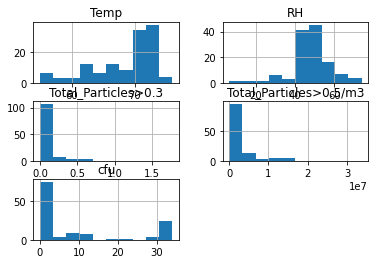

In [37]:
df1.hist(bins=10)

In [38]:
print("Rows:", df1.shape[0], "\nColumns:",df1.shape[1])

Rows: 125 
Columns: 10


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 19 to 2061
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    125 non-null    datetime64[ns]
 1   location                125 non-null    object        
 2   Temp                    125 non-null    float64       
 3   RH                      125 non-null    float64       
 4   Total_Particles>0.3     125 non-null    float64       
 5   Total_Particles>0.5/m3  125 non-null    float64       
 6   Traffic                 123 non-null    category      
 7   Weather                 123 non-null    category      
 8   cfu                     125 non-null    float64       
 9   Source                  125 non-null    object        
dtypes: category(2), datetime64[ns](1), float64(5), object(2)
memory usage: 9.6+ KB


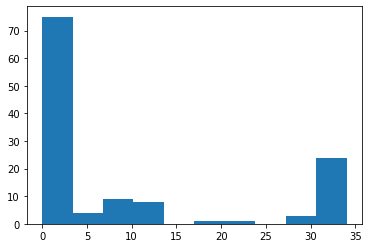

count    125.000000
mean       9.584000
std       13.183068
min        0.000000
25%        1.000000
50%        2.000000
75%       13.000000
max       34.000000
Name: cfu, dtype: float64

In [40]:
#looking at data
plt.hist(df1['cfu'])
plt.show()
df1.cfu.describe()

In [41]:
df1["cfu"].value_counts(dropna=False)

1.0     30
0.0     27
34.0    24
2.0     15
7.0      4
4.0      3
8.0      3
11.0     3
3.0      3
13.0     3
28.0     2
10.0     2
12.0     2
20.0     1
5.0      1
22.0     1
30.0     1
Name: cfu, dtype: int64

In [42]:
df1.corr()

,Temp,RH,Total_Particles>0.3,Total_Particles>0.5/m3,cfu
Temp,1.000000,-0.069585,-0.598834,-0.659862,-0.606895
RH,-0.069585,1.000000,0.003581,0.104402,-0.078766
Total_Particles>0.3,-0.598834,0.003581,1.000000,0.872794,0.414355
Total_Particles>0.5/m3,-0.659862,0.104402,0.872794,1.000000,0.484470
cfu,-0.606895,-0.078766,0.414355,0.484470,1.000000


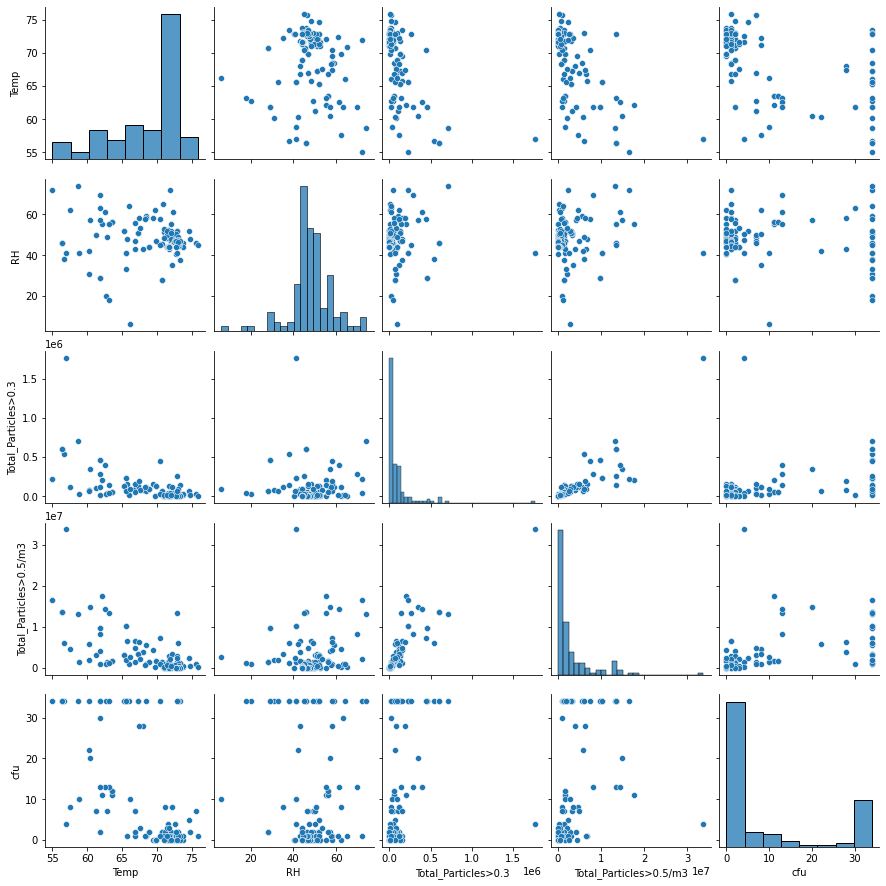

In [43]:
sns.pairplot(df1)

Many locations are named in differing patterns, or the room number is in the prior sample(s).

## Data Organization

File structure on github.

## Data Definition

Columns are temperature(Temp), relative humidity(RH), total amount of particulates larger than 0.3 microns(Total_Particles>0.3), total amount of particulates greater than 0.5 microns in a cubic meter (Total_Particles>0.5/m3), total fungus colony forming units(cfu).

## Data Cleaning
Goal: Clean up the data in order to prepare it for the next steps of your project